In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [25]:
pd.options.display.max_columns = None
df = pd.read_csv('1차테스트데이터.csv',encoding='cp949')
df.drop(columns=['통계청 한국표준산업분류 10차(소분류)'],axis=1,inplace=True)
df

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,재고자산증가율,자기자본증가율,순이익증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본정상영업이익율,매출액정상영업이익율,총자본순이익율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,노동장비율,기계장비율,자본집약도,노동소득분배율,설비투자효율,총자본투자효율,기계투자효율,부가가치율,종업원수증가율,R & D 투자효율,무형자산처리무형자산개발비(천원),경상개발비(천원)
0,(주)CMG제약,58820,11-Dec,3.53,1.98,-5.91,17.64,-1.43,-2.02,NaN,41.83,-8.50,-8.28,2.37,3.61,-5.58,200.97,165.03,15.10,51.41,9.08,-46.08,-24.07,-172.40,66.05,0.97,3.74,1.90,1.77,11.95,0.97,2.01,1.25,71726.36,29216.43,202260.73,0.00,35.86,0.13,0.88,0.20,4.65,0.13,0.0,23703.0
1,(주)CMG제약,58820,12-Dec,-7.75,109.15,-4.12,207.08,7.73,75.17,NaN,28.34,-40.97,-26.84,-9.96,-25.87,-15.78,693.49,649.98,68.81,80.77,30.58,-8.10,-12.71,-11.83,55.32,0.66,4.09,1.45,1.71,7.83,0.66,0.93,0.52,69458.82,32002.75,426179.37,0.02,2.89,0.00,0.06,0.02,-0.74,0.74,0.0,120052.0
2,(주)CMG제약,58820,13-Dec,0.70,-2.09,16.09,-18.89,56.29,55.10,NaN,38.70,1.45,0.74,1.40,3.88,0.52,694.71,610.74,394.63,14.11,2.53,-39.85,-13.51,-194.73,87.63,0.51,3.30,1.61,2.03,6.20,0.51,1.26,0.48,66012.04,33789.62,411121.79,0.00,77.91,0.13,1.52,0.34,1.49,0.66,5993000.0,134454.0
3,(주)CMG제약,58820,14-Dec,3.60,3.86,74.30,-25.93,6.37,0.01,-46.64,37.07,0.69,0.32,0.78,1.94,0.28,324.58,268.23,101.24,18.50,2.66,-17.73,-7.06,-104.12,84.39,0.46,3.00,1.48,1.54,5.27,0.46,2.85,0.68,113899.65,48479.94,354075.16,0.00,37.80,0.12,0.89,0.31,20.59,0.51,3511000.0,116533.0
4,(주)CMG제약,58820,15-Dec,-32.22,-2.64,-5.37,-7.17,11.04,-4.48,-2409.61,36.26,-13.50,-7.62,-4.49,-9.51,-6.37,296.85,235.21,29.00,20.78,0.01,16.12,5.80,24988.82,82.80,0.56,3.32,1.66,1.48,5.66,0.56,2.88,0.99,114246.59,53386.77,362389.88,0.00,24.21,0.08,0.52,0.16,-4.88,3.08,3464000.0,831910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,흥아해운(주),3280,15-Dec,1.02,21.93,49.36,-11.18,-12.92,3.39,-42.68,6.20,1.24,6.18,2.95,2.51,1.46,51.92,47.54,7.76,357.39,32.82,2.78,2.03,6.61,21.86,4.96,64.23,24.38,2.09,16.05,4.96,1.54,5.83,593960.16,14.23,973727.92,0.00,21.49,0.13,8970.81,0.12,7.68,0.00,NaN,0.0
15146,흥아해운(주),3280,16-Dec,0.21,21.08,38.84,-25.08,56.39,11.22,-263.29,4.49,-2.06,-9.40,0.67,0.71,-1.96,39.46,32.52,5.46,397.97,26.94,2.12,1.96,6.30,20.08,4.55,53.94,24.30,1.44,16.26,4.55,1.20,6.98,706868.14,12.28,1017550.17,0.00,15.81,0.11,9100.38,0.13,15.87,0.00,NaN,0.0
15147,흥아해운(주),3280,17-Dec,-0.42,-11.43,-16.50,13.29,11.18,-39.28,NaN,2.09,-8.79,-47.52,-1.45,-1.57,-8.13,35.76,29.58,6.17,626.32,31.84,-0.57,-0.50,-1.53,13.77,5.41,43.17,22.18,1.36,15.39,5.41,1.12,7.68,599097.86,12.56,921779.07,0.00,8.35,0.05,3982.05,0.06,-2.23,0.00,NaN,0.0
15148,흥아해운(주),3280,18-Dec,-1.16,-5.33,-12.07,-6.33,-5.85,-37.42,NaN,-0.93,-11.48,-91.08,-4.55,-4.99,-10.47,34.67,28.66,4.89,998.73,31.60,-2.78,-2.70,-8.01,9.10,7.93,39.24,18.17,1.43,11.87,7.93,1.03,6.73,618981.48,14.54,1009671.43,0.00,6.91,0.04,2943.38,0.05,-13.57,0.00,NaN,0.0


In [4]:
# pd.options.display.max_rows = 50

In [5]:
# df = df.replace('#NAME?',None)

In [26]:
df.isna().sum()

회사명                     0
거래소코드                   0
회계년도                    0
이자보상배율                  0
총자산증가율                204
유형자산증가율               206
유동자산증가율               204
재고자산증가율               998
자기자본증가율               204
순이익증가율               2980
매출액총이익율               272
매출액순이익율               272
자기자본순이익율              272
총자본정상영업이익율            272
매출액정상영업이익율            272
총자본순이익율               272
유동비율                  272
당좌비율                  272
현금비율                  271
부채비율                  272
차입금의존도                272
CASH_FLOW_대_부채비율      272
CASH_FLOW_대_매출액비율     272
CASH_FLOW_대_차입금비율     272
자기자본구성비율              272
총자본회전율                851
재고자산회전율              1507
매출채권회전율               929
유형자산회전율               851
매입채무회전율              1315
자기자본회전율               851
타인자본회전율               851
유동자산회전율              4284
노동장비율                 274
기계장비율                 274
자본집약도                 274
노동소득분배율               274
설비투자효율                276
총자본투자효율     

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                15150 non-null  object 
 1   거래소코드              15150 non-null  int64  
 2   회계년도               15150 non-null  object 
 3   이자보상배율             15150 non-null  float64
 4   총자산증가율             14946 non-null  float64
 5   유형자산증가율            14944 non-null  float64
 6   유동자산증가율            14946 non-null  float64
 7   재고자산증가율            14152 non-null  float64
 8   자기자본증가율            14946 non-null  float64
 9   순이익증가율             12170 non-null  float64
 10  매출액총이익율            14878 non-null  float64
 11  매출액순이익율            14878 non-null  float64
 12  자기자본순이익율           14878 non-null  float64
 13  총자본정상영업이익율         14878 non-null  float64
 14  매출액정상영업이익율         14878 non-null  float64
 15  총자본순이익율            14878 non-null  float64
 16  유동비율               148

In [28]:
# df = df.fillna(2)
df = df.dropna()

<AxesSubplot:>

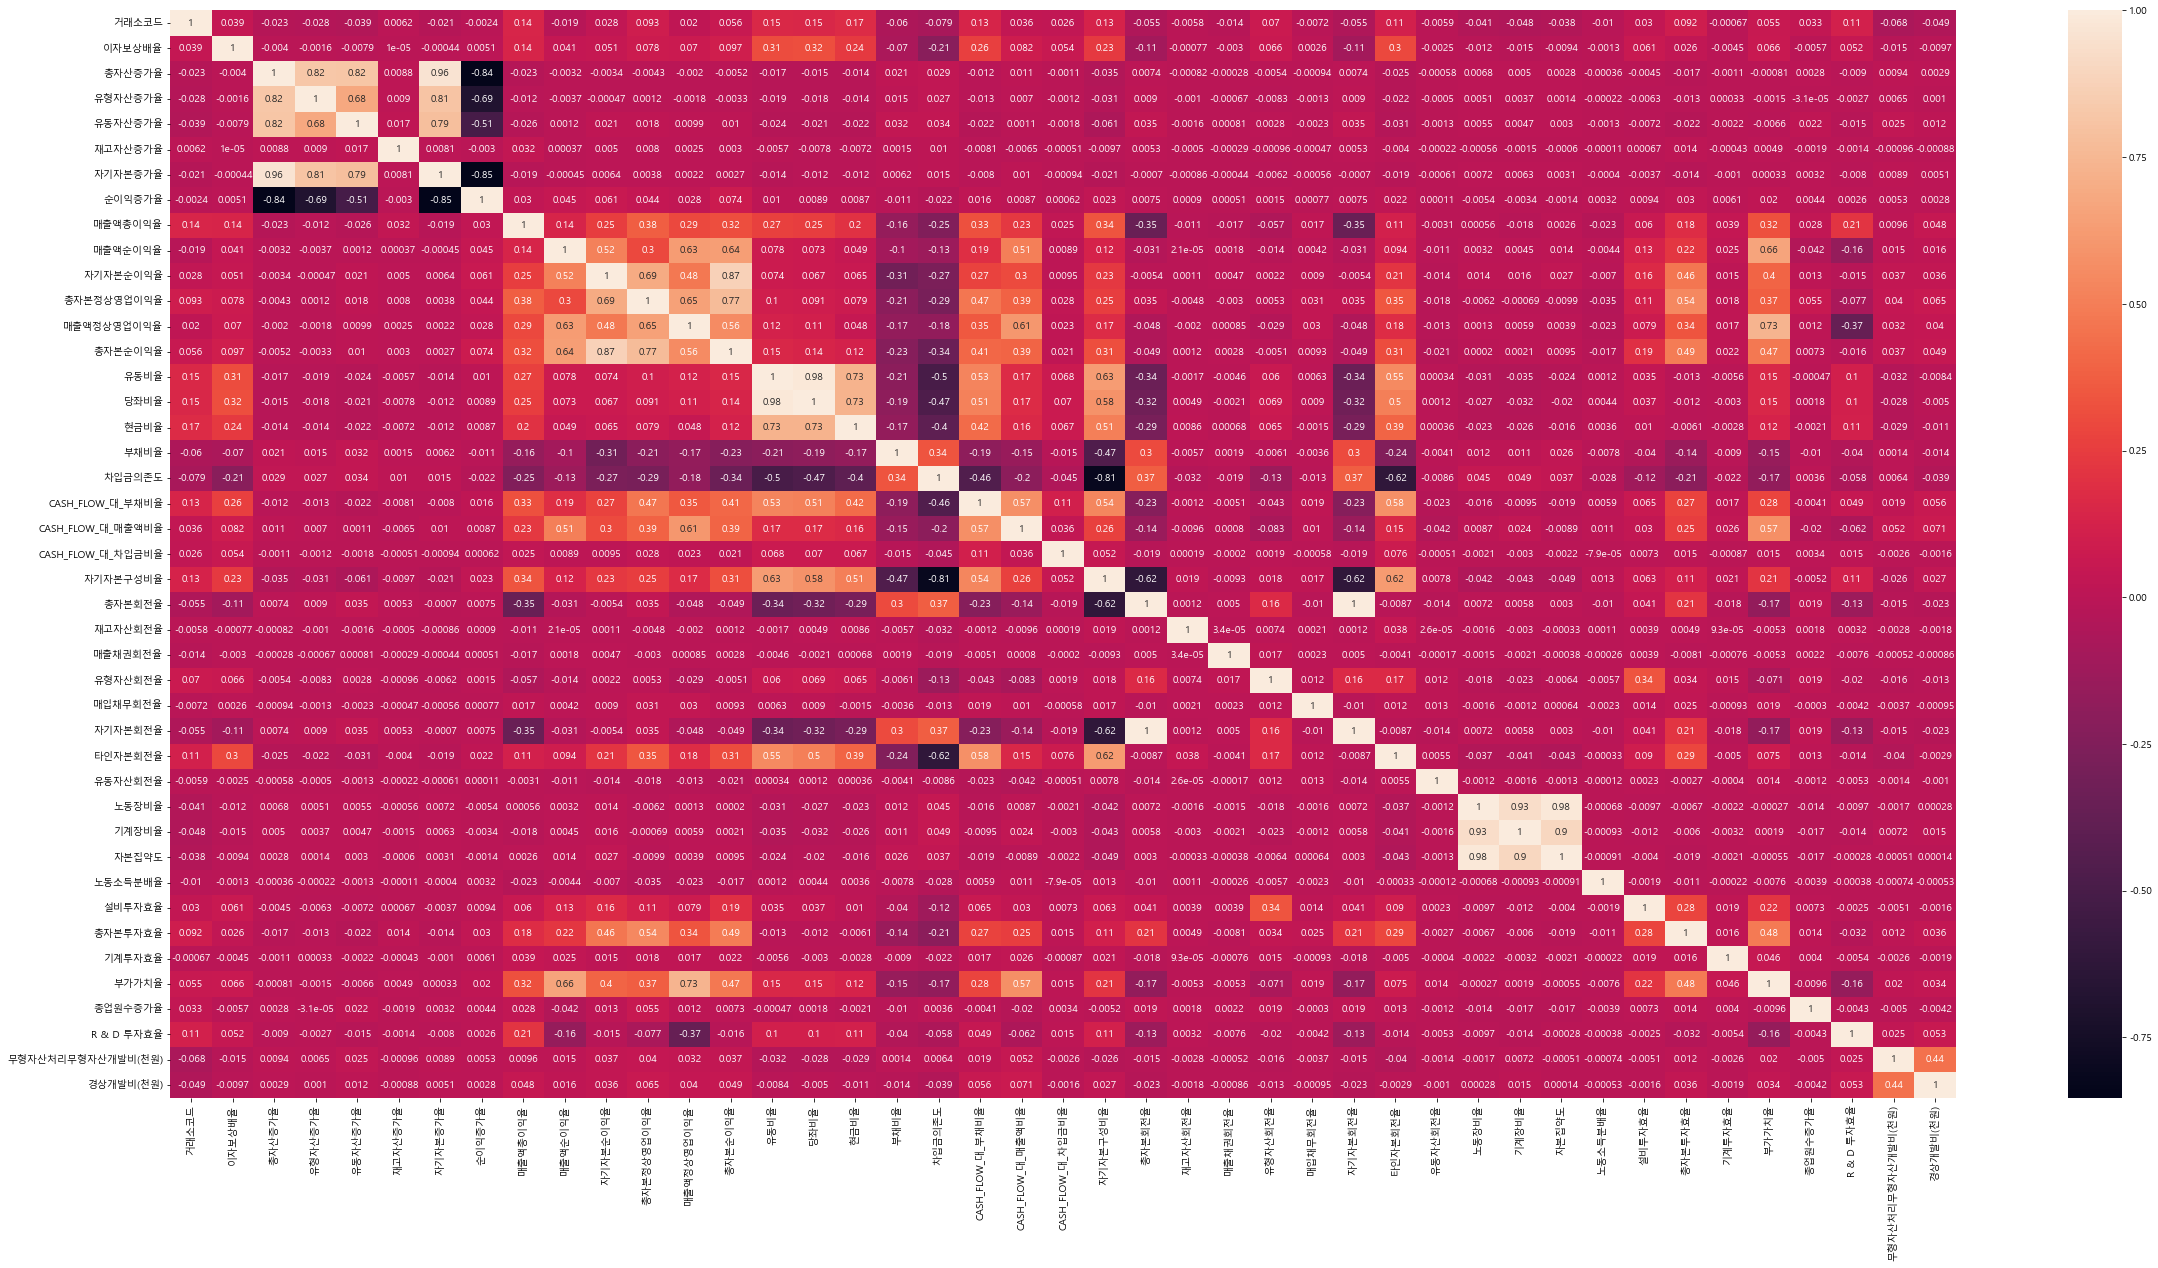

In [29]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(),annot=True)

In [127]:
# df = df.iloc[:,3:].astype(float)
# df

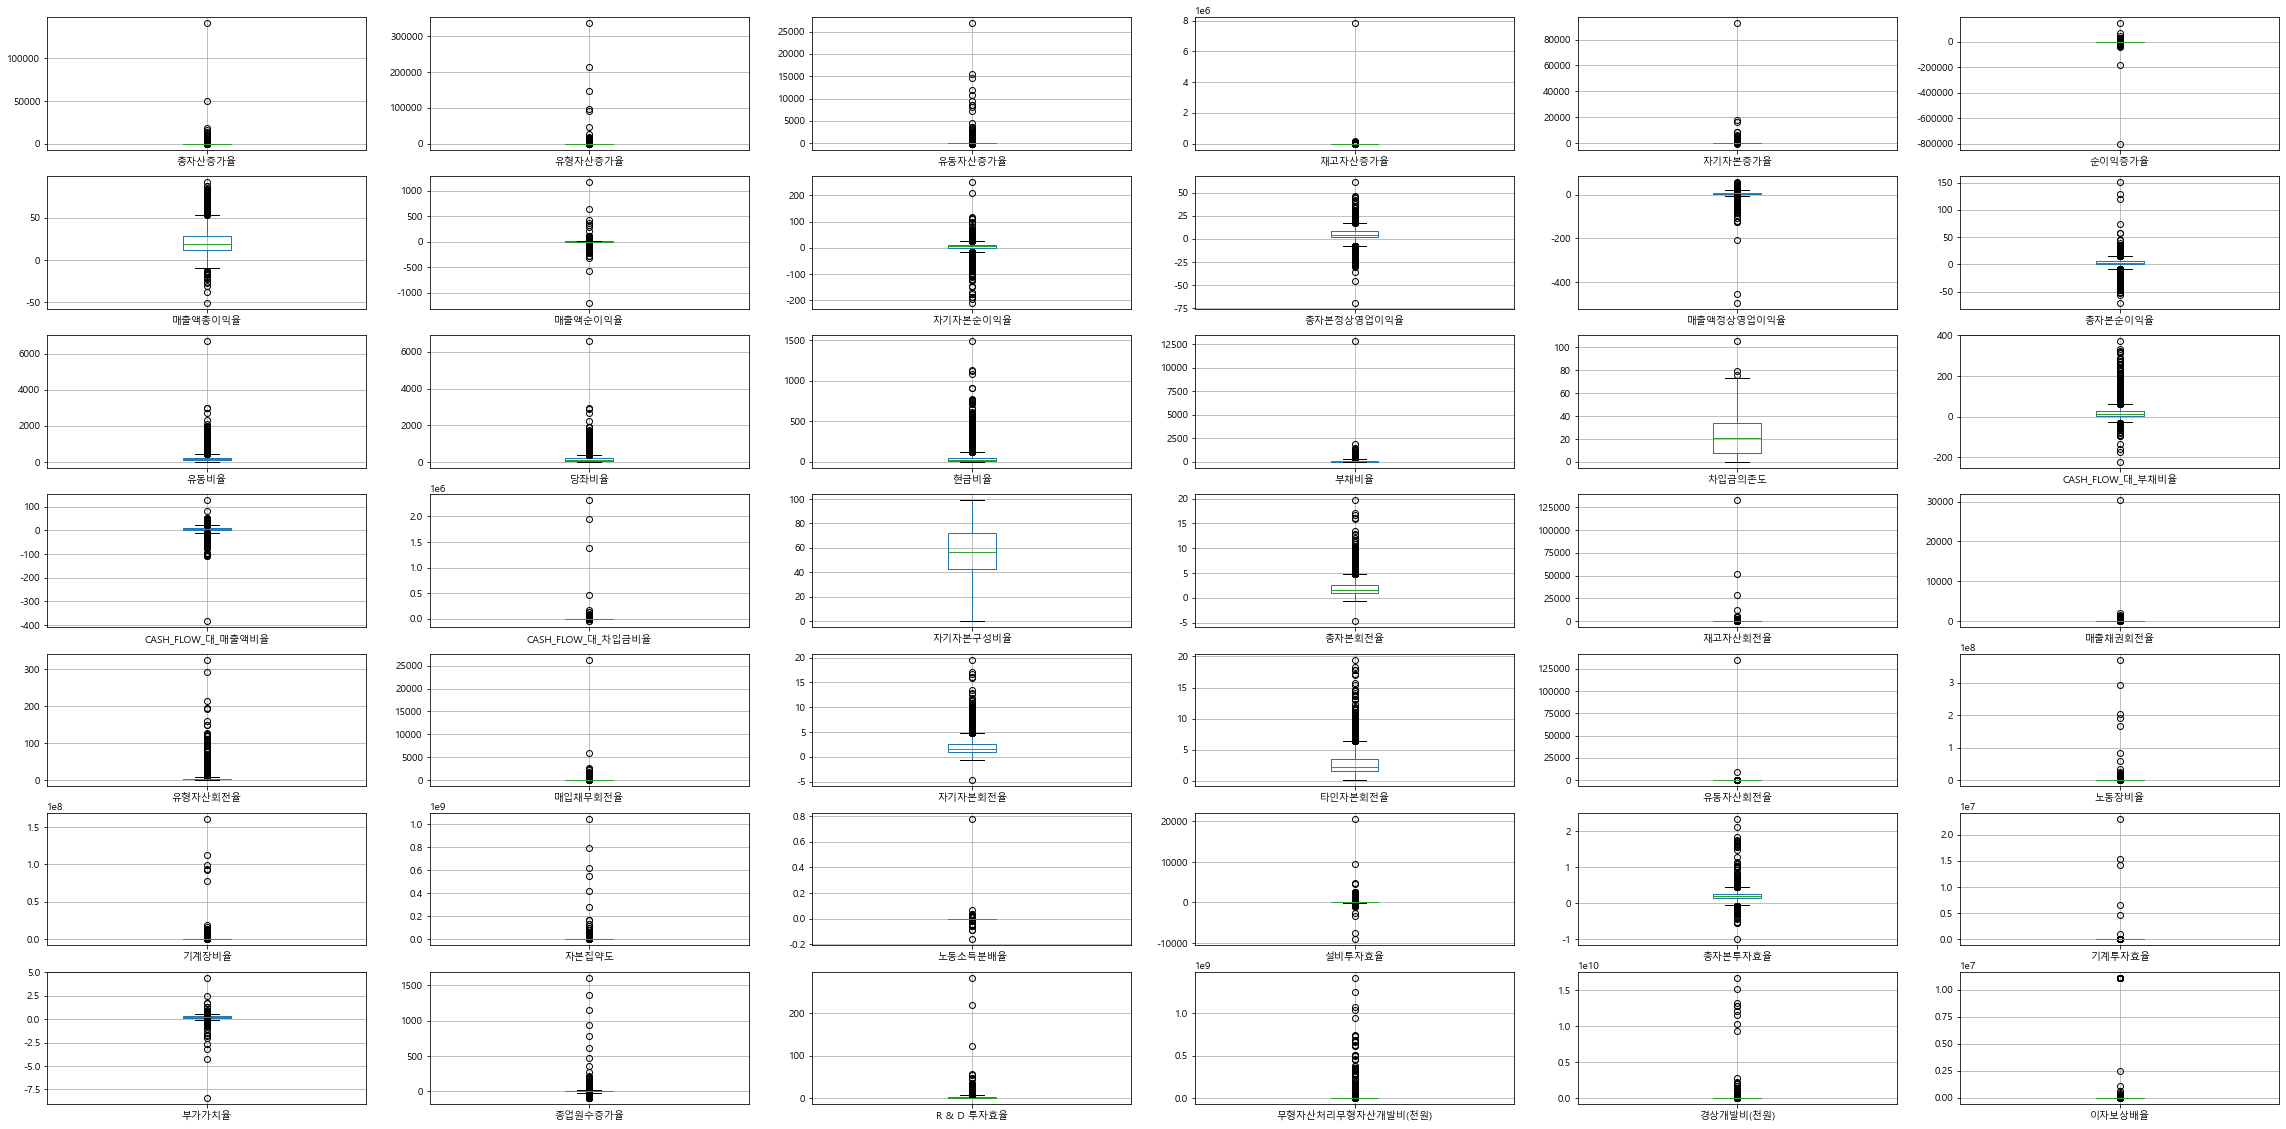

In [31]:
# 이상치 박스플롯
from matplotlib.pyplot import imread

fig, axes = plt.subplots(7, 6)
fig.set_size_inches((40,20))

df.boxplot(column="총자산증가율", ax=axes[0,0])
df.boxplot(column="유형자산증가율", ax=axes[0,1])
df.boxplot(column="유동자산증가율", ax=axes[0,2])
df.boxplot(column="재고자산증가율", ax=axes[0,3])
df.boxplot(column="자기자본증가율", ax=axes[0,4])
df.boxplot(column="순이익증가율", ax=axes[0,5])
df.boxplot(column="매출액총이익율", ax=axes[1,0])
df.boxplot(column="매출액순이익율", ax=axes[1,1])
df.boxplot(column="자기자본순이익율", ax=axes[1,2])
df.boxplot(column="총자본정상영업이익율", ax=axes[1,3])
df.boxplot(column="매출액정상영업이익율", ax=axes[1,4])
df.boxplot(column="총자본순이익율", ax=axes[1,5])
df.boxplot(column="유동비율", ax=axes[2,0])
df.boxplot(column="당좌비율", ax=axes[2,1])
df.boxplot(column="현금비율", ax=axes[2,2])
df.boxplot(column="부채비율", ax=axes[2,3])
df.boxplot(column="차입금의존도", ax=axes[2,4])
df.boxplot(column="CASH_FLOW_대_부채비율", ax=axes[2,5])
df.boxplot(column="CASH_FLOW_대_매출액비율", ax=axes[3,0])
df.boxplot(column="CASH_FLOW_대_차입금비율", ax=axes[3,1])
df.boxplot(column="자기자본구성비율", ax=axes[3,2])
df.boxplot(column="총자본회전율", ax=axes[3,3])
df.boxplot(column="재고자산회전율", ax=axes[3,4])
df.boxplot(column="매출채권회전율", ax=axes[3,5])
df.boxplot(column="유형자산회전율", ax=axes[4,0])
df.boxplot(column="매입채무회전율", ax=axes[4,1])
df.boxplot(column="자기자본회전율", ax=axes[4,2])
df.boxplot(column="타인자본회전율", ax=axes[4,3])
df.boxplot(column="유동자산회전율", ax=axes[4,4])
df.boxplot(column="노동장비율", ax=axes[4,5])
df.boxplot(column="기계장비율", ax=axes[5,0])
df.boxplot(column="자본집약도", ax=axes[5,1])
df.boxplot(column="노동소득분배율", ax=axes[5,2])
df.boxplot(column="설비투자효율", ax=axes[5,3])
df.boxplot(column="총자본투자효율", ax=axes[5,4])
df.boxplot(column="기계투자효율", ax=axes[5,5])
df.boxplot(column="부가가치율", ax=axes[6,0])
df.boxplot(column="종업원수증가율", ax=axes[6,1])
df.boxplot(column="R & D 투자효율", ax=axes[6,2])
df.boxplot(column="무형자산처리무형자산개발비(천원)", ax=axes[6,3])
df.boxplot(column="경상개발비(천원)", ax=axes[6,4])
df.boxplot(column="이자보상배율", ax=axes[6,5])

plt.show()

In [33]:
cols = []

df_iqr = df.copy()
df_iqr = df_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본증가율', '순이익증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율',
       '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율', '유동비율', '당좌비율', '현금비율', '부채비율',
       '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율', 'CASH_FLOW_대_차입금비율',
       '자기자본구성비율', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율', '매입채무회전율',
       '자기자본회전율', '타인자본회전율', '유동자산회전율', '노동장비율', '기계장비율', '자본집약도', '노동소득분배율',
       '설비투자효율', '총자본투자효율', '기계투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율',
       '무형자산처리무형자산개발비(천원)', '경상개발비(천원)']]
cols.append([col for col in df_iqr])

Q1 = df_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본증가율', '순이익증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율',
       '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율', '유동비율', '당좌비율', '현금비율', '부채비율',
       '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율', 'CASH_FLOW_대_차입금비율',
       '자기자본구성비율', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율', '매입채무회전율',
       '자기자본회전율', '타인자본회전율', '유동자산회전율', '노동장비율', '기계장비율', '자본집약도', '노동소득분배율',
       '설비투자효율', '총자본투자효율', '기계투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율',
       '무형자산처리무형자산개발비(천원)', '경상개발비(천원)']].quantile(q=0.25)

Q3 = df_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본증가율', '순이익증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율',
       '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율', '유동비율', '당좌비율', '현금비율', '부채비율',
       '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율', 'CASH_FLOW_대_차입금비율',
       '자기자본구성비율', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율', '매입채무회전율',
       '자기자본회전율', '타인자본회전율', '유동자산회전율', '노동장비율', '기계장비율', '자본집약도', '노동소득분배율',
       '설비투자효율', '총자본투자효율', '기계투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율',
       '무형자산처리무형자산개발비(천원)', '경상개발비(천원)']].quantile(q=0.75)

IQR = Q3 - Q1
for i in cols:
    df_iqr[i] = df_iqr[i][(df_iqr[i] <= Q3[i]+1.5*IQR[i]) & (df_iqr[i] >= Q1[i]-1.5*IQR[i])]

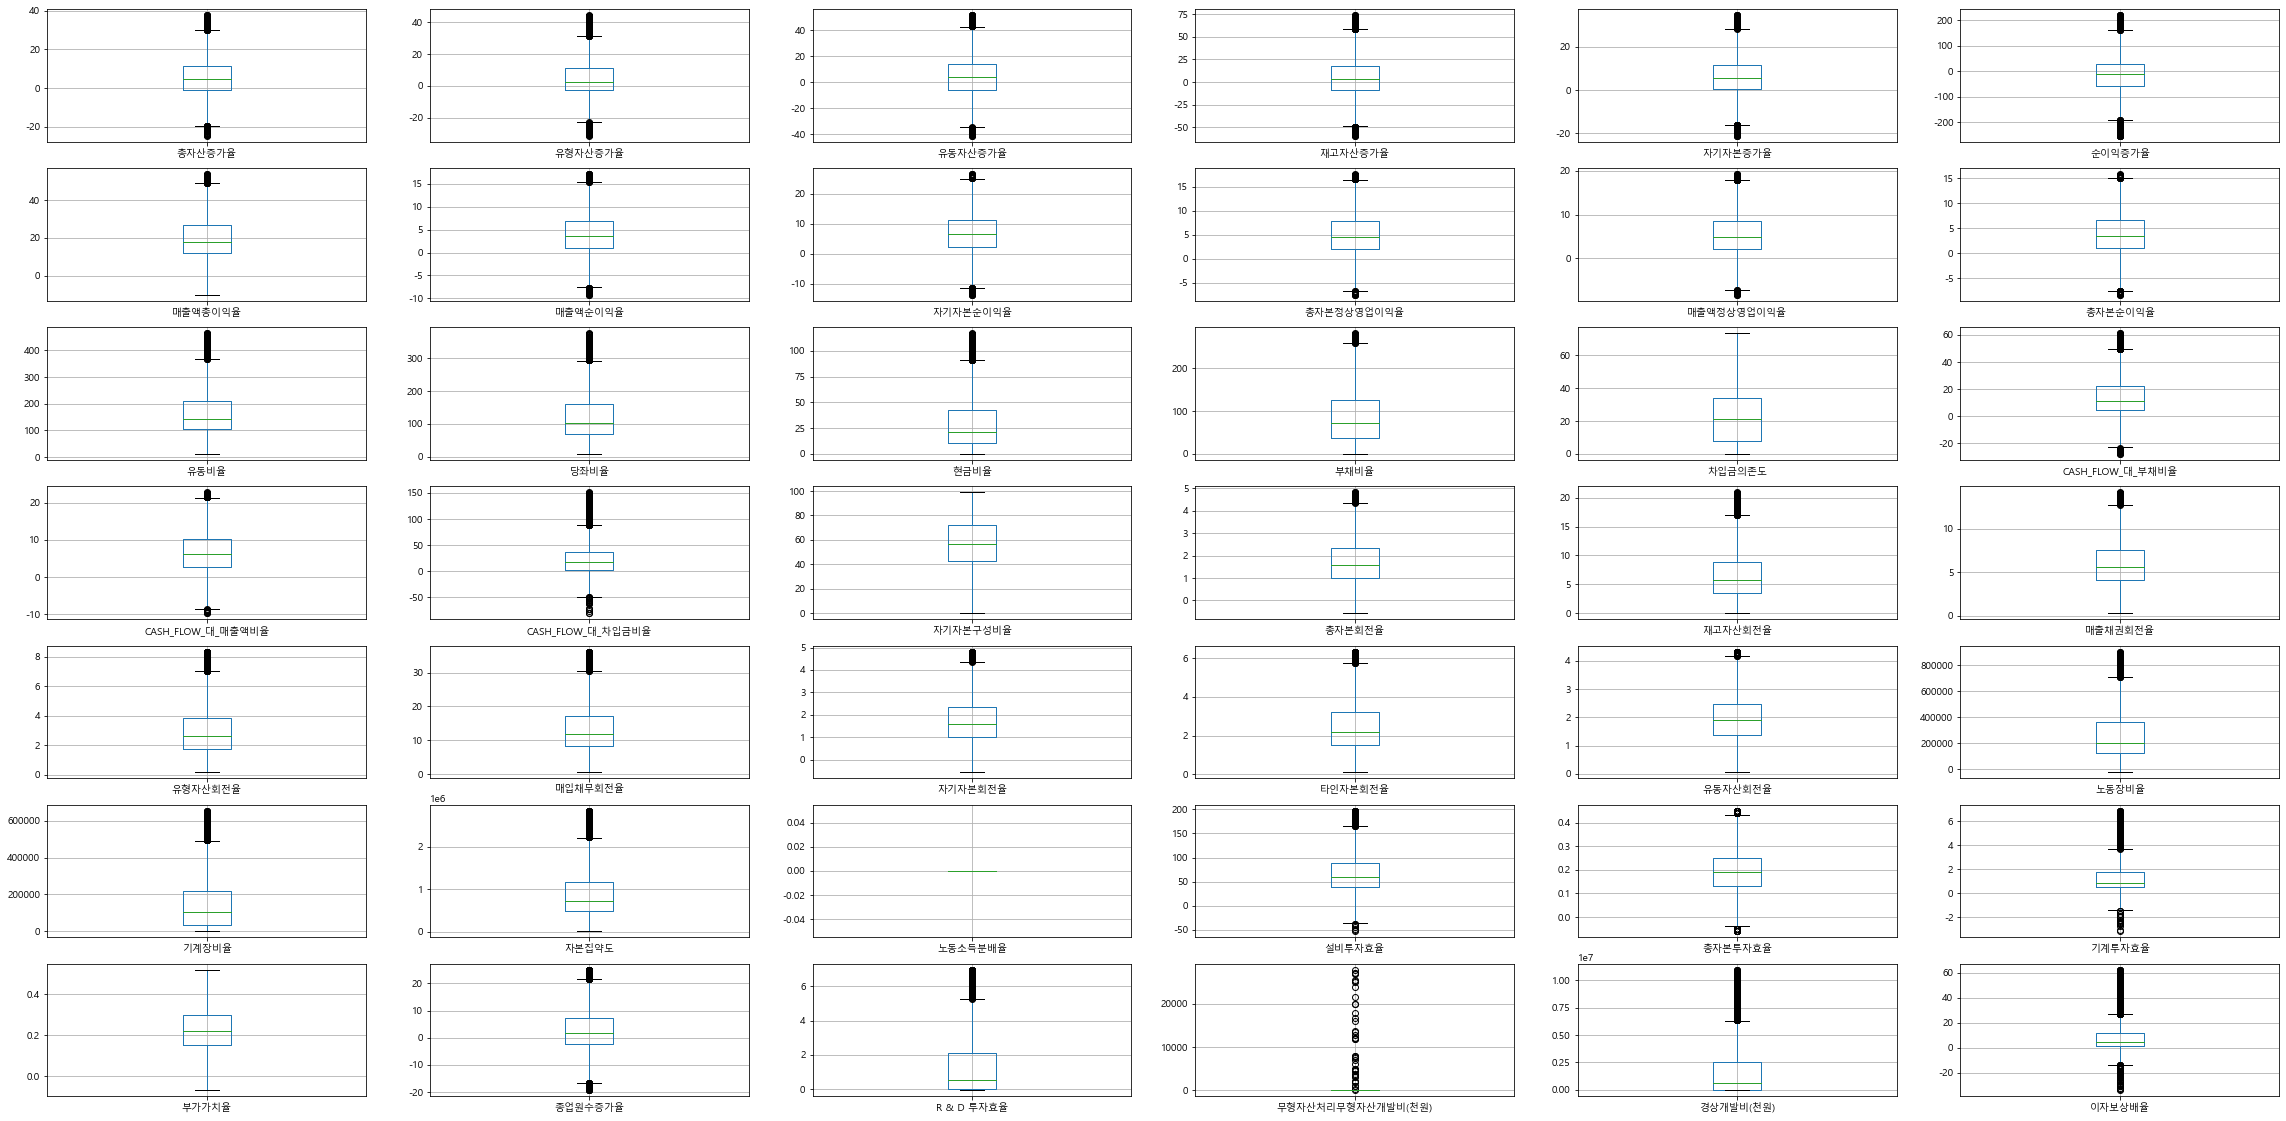

In [34]:
# 이상치 박스플롯
from matplotlib.pyplot import imread

fig, axes = plt.subplots(7, 6)
fig.set_size_inches((40,20))

df_iqr.boxplot(column="총자산증가율", ax=axes[0,0])
df_iqr.boxplot(column="유형자산증가율", ax=axes[0,1])
df_iqr.boxplot(column="유동자산증가율", ax=axes[0,2])
df_iqr.boxplot(column="재고자산증가율", ax=axes[0,3])
df_iqr.boxplot(column="자기자본증가율", ax=axes[0,4])
df_iqr.boxplot(column="순이익증가율", ax=axes[0,5])
df_iqr.boxplot(column="매출액총이익율", ax=axes[1,0])
df_iqr.boxplot(column="매출액순이익율", ax=axes[1,1])
df_iqr.boxplot(column="자기자본순이익율", ax=axes[1,2])
df_iqr.boxplot(column="총자본정상영업이익율", ax=axes[1,3])
df_iqr.boxplot(column="매출액정상영업이익율", ax=axes[1,4])
df_iqr.boxplot(column="총자본순이익율", ax=axes[1,5])
df_iqr.boxplot(column="유동비율", ax=axes[2,0])
df_iqr.boxplot(column="당좌비율", ax=axes[2,1])
df_iqr.boxplot(column="현금비율", ax=axes[2,2])
df_iqr.boxplot(column="부채비율", ax=axes[2,3])
df_iqr.boxplot(column="차입금의존도", ax=axes[2,4])
df_iqr.boxplot(column="CASH_FLOW_대_부채비율", ax=axes[2,5])
df_iqr.boxplot(column="CASH_FLOW_대_매출액비율", ax=axes[3,0])
df_iqr.boxplot(column="CASH_FLOW_대_차입금비율", ax=axes[3,1])
df_iqr.boxplot(column="자기자본구성비율", ax=axes[3,2])
df_iqr.boxplot(column="총자본회전율", ax=axes[3,3])
df_iqr.boxplot(column="재고자산회전율", ax=axes[3,4])
df_iqr.boxplot(column="매출채권회전율", ax=axes[3,5])
df_iqr.boxplot(column="유형자산회전율", ax=axes[4,0])
df_iqr.boxplot(column="매입채무회전율", ax=axes[4,1])
df_iqr.boxplot(column="자기자본회전율", ax=axes[4,2])
df_iqr.boxplot(column="타인자본회전율", ax=axes[4,3])
df_iqr.boxplot(column="유동자산회전율", ax=axes[4,4])
df_iqr.boxplot(column="노동장비율", ax=axes[4,5])
df_iqr.boxplot(column="기계장비율", ax=axes[5,0])
df_iqr.boxplot(column="자본집약도", ax=axes[5,1])
df_iqr.boxplot(column="노동소득분배율", ax=axes[5,2])
df_iqr.boxplot(column="설비투자효율", ax=axes[5,3])
df_iqr.boxplot(column="총자본투자효율", ax=axes[5,4])
df_iqr.boxplot(column="기계투자효율", ax=axes[5,5])
df_iqr.boxplot(column="부가가치율", ax=axes[6,0])
df_iqr.boxplot(column="종업원수증가율", ax=axes[6,1])
df_iqr.boxplot(column="R & D 투자효율", ax=axes[6,2])
df_iqr.boxplot(column="무형자산처리무형자산개발비(천원)", ax=axes[6,3])
df_iqr.boxplot(column="경상개발비(천원)", ax=axes[6,4])
df_iqr.boxplot(column="이자보상배율", ax=axes[6,5])

plt.show()

In [36]:
x = df[['총자산증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본증가율', '순이익증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율',
       '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율', '유동비율', '당좌비율', '현금비율', '부채비율',
       '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율', 'CASH_FLOW_대_차입금비율',
       '자기자본구성비율', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율', '매입채무회전율',
       '자기자본회전율', '타인자본회전율', '유동자산회전율', '노동장비율', '기계장비율', '자본집약도', '노동소득분배율',
       '설비투자효율', '총자본투자효율', '기계투자효율', '부가가치율', '종업원수증가율', 'R & D 투자효율',
       '무형자산처리무형자산개발비(천원)', '경상개발비(천원)']]

In [37]:
# x = df[['cashflow_부채비율','당좌비율','매입채무회전율','매출액총이익률',
#         '매출원가대매출액비율','매출채권회전율','부채비율',
#         '유동부채','유동비율','유동자산구성비율','유동자산증가율','유형자산증가율','유형자산회전율',
#         '자기자본구성비율','자본증가율','타인자본회전율','재고자산_유동자산비율','재고자산증가율','재고자산회전율',
#         '차입금의존도','총자본영업이익률','총자산순이익률','총자산증가율','총자산회전율','현금비율']]

In [38]:
y = df['이자보상배율']

In [39]:
x.shape

(5480, 41)

In [40]:
y.shape

(5480,)

In [41]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 이자보상배율   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     23.84
Date:                Sat, 24 Sep 2022   Prob (F-statistic):          5.11e-159
Time:                        01:54:06   Log-Likelihood:                -86231.
No. Observations:                5480   AIC:                         1.725e+05
Df Residuals:                    5439   BIC:                         1.728e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.296e+05   2.49e+05      1.326      0.185   -1.58e+05    8.17e+05
총자산증가율              -16.7659     46.692     -0.359      0.720    -108.301      74.769
유형자산증가율               2.1621      6.489      0.333      0.739     -10.559      14.883
유동자산증가율             -39.4271     80.864     -0.488      0.626    -197.954     119.099
재고자산증가율               0.0320      0.212      0.151      0.880      -0.383       0.447
자기자본증가율              59.5244     68.177      0.873      0.383     -74.130     193.179
순이익증가율                2.8626      4.761      0.601      0.548      -6.472      12.197
매출액총이익율            8993.6330   1876.660      4.792      0.000    5314.628    1.27e+04
매출액순이익율           -4503.4220   1593.283     -2.827      0.005   -7626.895   -1379.949
자기자본순이익율           -509.3575   3071.210     -0.166      0.868   -6530.158    5511.443
총자본정상영업이익율        -3.963e+04   9286.353     -4.268      0.000   -5.78e+04   -2.14e+04
매출액정상영업이익율         1.074e+04   4348.781      2.469      0.014    2211.965    1.93e+04
총자본순이익율            2.536e+04   9232.778      2.747      0.006    7260.568    4.35e+04
유동비율              -2899.6445    521.070     -5.565      0.000   -3921.150   -1878.139
당좌비율               4188.4314    543.865      7.701      0.000    3122.238    5254.625
현금비율                435.8864    409.315      1.065      0.287    -366.535    1238.308
부채비율                 39.0393    134.461      0.290      0.772    -224.557     302.636
차입금의존도            -2217.5470   2642.220     -0.839      0.401   -7397.356    2962.262
CASH_FLOW_대_부채비율   4313.9696   1241.387      3.475      0.001    1880.355    6747.584
CASH_FLOW_대_매출액비율 -3330.1478   3389.752     -0.982      0.326   -9975.418    3315.123
CASH_FLOW_대_차입금비율     0.6720      0.495      1.357      0.175      -0.299       1.643
자기자본구성비율          -1.423e+04   3428.346     -4.151      0.000    -2.1e+04   -7509.503
총자본회전율            -4.718e+04   1.29e+04     -3.650      0.000   -7.25e+04   -2.18e+04
재고자산회전율             -11.6658     11.387     -1.024      0.306     -33.989      10.657
매출채권회전율             -15.0865     54.369     -0.277      0.781    -121.672      91.499
유형자산회전율            2873.6332   2154.946      1.334      0.182   -1350.924    7098.190
매입채무회전율             -11.1676     59.875     -0.187      0.852    -128.547     106.212
자기자본회전율           -4.718e+04   1.29e+04     -3.650      0.000   -7.25e+04   -2.18e+04
타인자본회전율            2.851e+05   2.37e+04     12.029      0.000    2.39e+05    3.32e+05
유동자산회전율              -4.2683     12.256     -0.348      0.728     -28.295      19.759
노동장비율                 0.0114      0.018      0.638      0.524      -0.024       0.047
기계장비율                -0.0017      0.017     -0.104      0.917      -0.034       0.031
자본집약도                -0.0040      0.005     -0.734      0.463      -0.015

In [42]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
%matplotlib inline

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-3.20652042e+12 -5.02811693e+12 -1.32729163e+14 -2.22552905e+12
 -2.88656643e+12]
 5 folds 의 개별 RMSE scores :  [ 1790675.968  2242346.3   11520814.339  1491820.718  1698989.827]
 5 folds 의 평균 RMSE : 3748929.430 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.65034e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.27293e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.67618e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.35675e-19): result may not be accurate.
  return linalg.solve(A, Xy, sy

alpha 0 일 때 5 folds 의 평균 RMSE : 3687175.988 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 3687539.701 
alpha 1 일 때 5 folds 의 평균 RMSE : 3694490.856 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.83431e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.80729e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.93418e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.74583e-22): result may not be accurate.
  return linalg.solve(A, Xy, sy

alpha 10 일 때 5 folds 의 평균 RMSE : 3748929.430 
alpha 100 일 때 5 folds 의 평균 RMSE : 3849365.277 


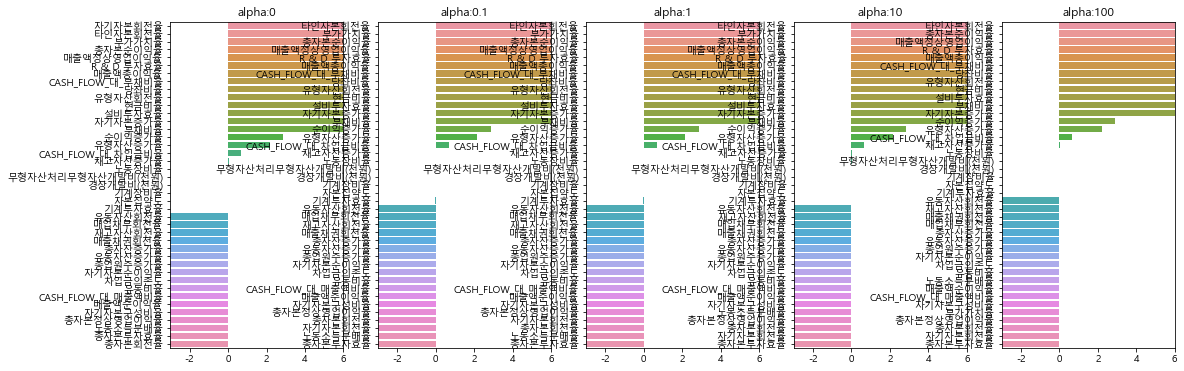

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
자기자본회전율,1.649933e+11,-47204.752704,-47444.006515,-49205.395427,-52209.079974
타인자본회전율,2.851191e+05,285070.100816,284634.522372,281212.852048,269134.060883
부가가치율,2.732435e+05,271610.923566,257569.853911,157207.680486,-18102.600896
총자본순이익율,2.536051e+04,25357.698863,25321.886433,24992.382489,24003.886830
매출액정상영업이익율,1.073732e+04,10754.801470,10900.595230,11919.415607,13646.563093
R & D 투자효율,1.040215e+04,10405.958883,10433.967205,10608.321559,10828.395527
매출액총이익율,8.993633e+03,8994.679850,9000.277045,9017.318681,8904.277035
CASH_FLOW_대_부채비율,4.313970e+03,4313.480025,4311.723415,4313.653696,4405.255631
당좌비율,4.188431e+03,4187.974006,4185.215484,4169.640474,4112.485424
유형자산회전율,2.873633e+03,2874.895782,2882.712734,2934.539647,3218.069905


In [43]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구하고, 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(x, y)
   
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

     # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_, index=x.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

# alpha 값에 따른 컬럼별 회귀계수 출력
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

In [44]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=x, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.262e+15, tolerance: 1.499e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.616e+15, tolerance: 1.101e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 3686882.093 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.608e+12, tolerance: 1.755e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.262e+15, tolerance: 1.499e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 3686882.544 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.528e+12, tolerance: 1.755e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.262e+15, tolerance: 1.499e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 3686888.575 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.262e+15, tolerance: 1.499e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.616e+15, tolerance: 1.101e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 1일 때 5 폴드 세트의 평균 RMSE: 3686896.177 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.262e+15, tolerance: 1.499e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.616e+15, tolerance: 1.101e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 3일 때 5 폴드 세트의 평균 RMSE: 3686927.280 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
타인자본회전율,285118.687203,285118.526998,285116.390935,285113.720857,285103.040543
부가가치율,273231.696965,273226.626534,273159.020784,273074.513598,272736.484852
총자본순이익율,25360.478127,25360.464856,25360.287902,25360.066710,25359.181942
매출액정상영업이익율,10737.438112,10737.490110,10738.183420,10739.050058,10742.516609
R & D 투자효율,10402.173659,10402.184602,10402.330500,10402.512874,10403.242367
매출액총이익율,8993.645092,8993.650266,8993.719251,8993.805482,8994.150406
CASH_FLOW_대_부채비율,4313.965874,4313.964277,4313.942984,4313.916368,4313.809903
당좌비율,4188.427966,4188.426509,4188.407087,4188.382810,4188.285701
유형자산회전율,2873.636978,2873.638613,2873.660420,2873.687679,2873.796715
현금비율,435.888346,435.889188,435.900425,435.914471,435.970655


In [45]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=x, y_target_n=y)

# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

#######  ElasticNet #######


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.275e+15, tolerance: 1.499e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.730e+15, tolerance: 1.101e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 3847690.555 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.278e+15, tolerance: 1.499e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.074e+13, tolerance: 1.101e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 3853114.291 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.191e+13, tolerance: 1.755e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.306e+15, tolerance: 1.499e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 3814311.198 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.331e+15, tolerance: 1.499e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.853e+15, tolerance: 1.418e+12
  model = cd_fast.enet_coordinate_descent(


alpha 1일 때 5 폴드 세트의 평균 RMSE: 3752868.493 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.386e+15, tolerance: 1.499e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.828e+14, tolerance: 1.418e+12
  model = cd_fast.enet_coordinate_descent(


alpha 3일 때 5 폴드 세트의 평균 RMSE: 3578938.130 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
타인자본회전율,267949.207233,264453.300955,230727.748686,200406.655886,133088.859260
총자본순이익율,23930.344896,23732.049706,22199.867282,20755.488140,16568.340140
매출액정상영업이익율,13672.640877,13690.243584,13212.032177,12743.977282,11314.649592
R & D 투자효율,10821.102800,10788.668159,10380.629672,10007.210118,9015.092906
매출액총이익율,8884.597487,8827.655702,8415.528078,8092.053269,7284.685397
CASH_FLOW_대_부채비율,4421.723818,4474.754257,5070.701083,5622.009187,6834.358077
당좌비율,4106.996977,4091.331756,3958.654149,3843.909256,3578.907865
유형자산회전율,3246.620198,3323.092777,3751.952330,4030.343162,4645.092769
현금비율,470.295184,466.635040,422.895044,384.860589,298.389024
설비투자효율,131.362885,127.678088,113.784583,109.210520,103.260931


In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=x)
    print(X_data_scaled.shape, x.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y, verbose=False, return_coeff=False)

(5480, 41) (5480, 41)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 3687539.701 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 3694490.856 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 3748929.430 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 3849365.277 
(5480, 41) (5480, 41)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 3254724.719 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.80729e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.93418e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.74583e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.35369e-20): result may not be accurate.
  return linalg.solve(A, Xy, sy

alpha 1일 때 5 폴드 세트의 평균 RMSE: 3013140.343 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 2168665.706 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1706523.281 
(5480, 902) (5480, 41)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 151402498.537 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 114727861.189 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 63759299.291 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 17351477.841 
(5480, 41) (5480, 41)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1680038.816 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1673368.015 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1672895.008 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1694206.873 
(5480, 902) (5480, 41)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1716998.256 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1661019.665 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1662548.770 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1670322.672 
(5480, 41) (5480, 41)

## 변환 유형:Log, Polynomial Degree:None


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py", line 1122, in fit
    X, y = self._validate_data(
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py", line 899, in check_array
    _assert_all_finite(
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py", line 146, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
